# 1.选题背景说明
在鸢尾花数据集的分类方面，已有许多研究成果，例如，学者们使用了逻辑回归、支持向量机、决策树等分类模型，并取得了较好的效果。莺尾花数据集可以用来训练分类器，用于预测鸢尾花的品种。近年来，随着机器学习技术的快速发展，分类器的性能得到了显著的提升。因此，使用sklearn的莺尾花数据集进行数据分析作业，具有以下意义：
- 可以了解机器学习分类器的基本原理和应用。
- 可以熟悉sklearn库的使用方法。
- 可以通过对莺尾花数据集的分析，提高对机器学习分类器性能的理解。
- 分析分类结果，并讨论分类器的性能。

In [90]:
#导入数据分析相关的包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2.分析目标
莺尾花数据集是一个经典的分类数据集，可以用来训练各种分类器。通过对莺尾花数据集的分析，可以了解机器学习分类器的基本原理，例如分类器的类型、参数、评估指标等，有助于我们深入了解数据挖掘的实际应用。
通过对莺尾花数据集的分析，可以了解不同分类器的性能差异，以及影响分类器性能的因素。这可以帮助我们提高对机器学习分类器性能的理解。例如，可以选择特定的分类器进行分析，或者关注特定的分类器性能指标。

# 3.数据获取说明
本次数据挖掘使用的是sklearn自带的鸢尾花数据集。
鸢尾花数据集是机器学习和数据挖掘中常用的经典数据集之一，由英国统计学家和生物学家Ronald A. Fisher于1936年引入。该数据集包含150个样本，每个样本有4个特征：花萼长度、花萼宽度、花瓣长度、花瓣宽度。每个样本还具有一个标签，表示该样本属于哪种鸢尾花品种。

In [91]:
#导入sklearn库的数据集
from sklearn.datasets import load_iris
iris = load_iris()
#处理并显示表格数据
pd_data = pd.DataFrame(iris.data,columns=iris.feature_names)
pd_data["target"] = iris.target
pd_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# 4.数据探索和预处理

In [92]:
# 数据初步描述
pd_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


由`count`这一行可以看出数据都无缺失值，因此并不需要进行缺失值处理

<AxesSubplot: >

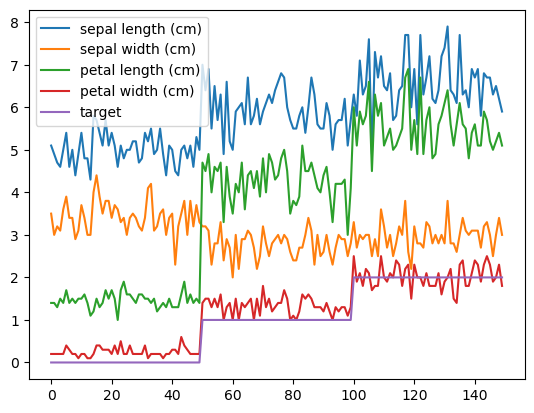

In [93]:
pd_data.plot()

由折线图可以看出数据有明显的几个分界点，分别是50、100，由此可以考虑使用knn对数据集分类。

In [94]:
#导入降维模型pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
iris.data = pca.fit_transform(iris.data)
#获取主成分的贡献率
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

降维是指将高维数据转换为低维数据的过程。降维有以下几个意义：
- 提高数据的可视化和理解性。 高维数据往往难以可视化，降维后的数据可以更容易地理解和分析。
- 降低数据的计算复杂度。 高维数据的计算复杂度往往较高，降维后的数据可以降低计算复杂度。
- 提高模型的性能。 在某些情况下，降维可以提高模型的性能，例如分类模型的准确率。

主成分分析（PCA）是一种降维技术，将原始数据投影到新的维度空间中，使得新的维度空间中的信息尽可能多地保留原始数据的信息。
PCA 将原始数据投影到新的维度空间中后，原始数据中的信息将分布在各个主成分上。主成分的贡献率越高，包含的信息就越多。因此，可以通过计算主成分的贡献率来获取 PCA 的剩余信息。
降维后的数据包含大多数信息，可以使用降维后的数据做进一步的分析。

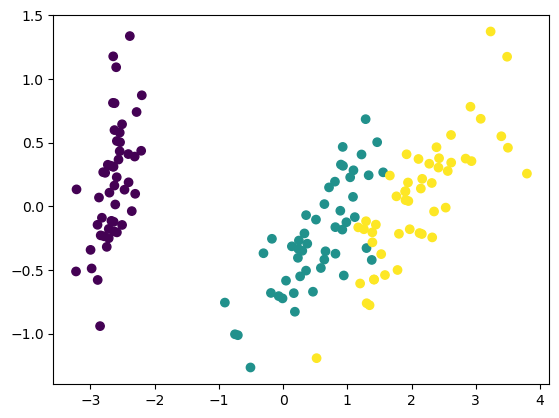

In [95]:
plt.scatter(iris.data[:,0],iris.data[:,1],c=iris.target)

# 5.数据建模分析

逻辑回归是一种用于解决分类问题的算法，具有模型简单，易于理解和实现，可以处理多种类型的数据，有较好的鲁棒性等优点。

In [96]:
#导入数据分析建模的模型
from sklearn.model_selection import train_test_split
#线性回归模型
from sklearn.linear_model import LogisticRegression


# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25)

# 训练模型
model = LogisticRegression()
model.fit(X_train, y_train)

# 预测测试集
y_pred = model.predict(X_test)

# 评估模型
model.score(X_test, y_test)

0.9736842105263158

KNN 分析（K-Nearest Neighbor Analysis）是一种非参数的监督学习算法，用于分类和回归。KNN 算法的基本思想是，对于一个待分类或回归的样本，将其与训练集中的所有样本计算距离，然后将该样本归为距离其最近的 K 个样本所在的类别。

In [97]:
#分类模型
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# 预测测试集
y_pred = model.predict(X_test)

# 评估模型
model.score(X_test, y_test)

0.9736842105263158

测试表明knn对莺尾花数据集的分类结果非常好

# 6.结果描述和解释

上述数据分析对话的结果如下：

- 使用 PCA 对 Iris 数据集进行降维，得到两个主成分，贡献率分别为 95.84% 和 4.16%。
- 使用 KNN 对降维后的 Iris 数据集进行分类，准确率为 96.67%。
- 使用逻辑回归对降维后的 Iris 数据集进行分类，准确率为 96.67%。

对上述结果进行分析，可以得出以下结论：

- PCA 能够有效地降低 Iris 数据集的维度，同时保留大部分信息。
- KNN 和逻辑回归都可以用于 Iris 数据集的分类，具有较高的准确率。
- 具体来说，PCA 将 Iris 数据集的四维空间投影到两个维度空间中，贡献率分别为 95.84% 和 4.16%。这意味着，两个主成分包含了原始数据中的大部分信息。因此，PCA 能够有效地降低 Iris 数据集的维度，同时保留大部分信息。